In [1]:
import rasterio
import numpy as np
from datetime import datetime, timedelta
from affine import Affine
from pyproj import Proj, transform
import os, glob
import gdal, osr
import pandas as pd
%matplotlib inline

In [2]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'W':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    #parts = re.split('[^\d\w]+', dms)
    parts = re.split('[^\d\w\.]+', dms)
    #print (parts)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    long = dms2dd(parts[4], parts[5], parts[6], parts[7])
    #lat = dms2dd(parts[0], parts[1], parts[2] + "." + parts[3], parts[4])
    return (lat, long)

In [3]:
# create the list of files to use
tifdir = r'D:\Projects\Pr\3492.10\MYD13Q1\tif'
tiffiles = glob.glob(os.path.join(tifdir, 'MYD13Q1.A2016*.tif'))
print (tiffiles[0])

D:\Projects\Pr\3492.10\MYD13Q1\tif\MYD13Q1.A2016105.h18v03.006.2016123094508_projected_250m 16 days NDVI.tif


In [4]:
loc_stations = {'Bankenbos' :"""53°1'14.75"N 6°24'9.93"E""",
                'Fleditebos':"""52°19'6.00"N 5°27'12.00"E""",
                'Kampina'   :"""51°34'1.00"N 5°17'27.00"E""",
                'Cabauw'    :"""51°58'12.79"N 4°55'34.28"E""",
                'Haastrecht':"""52°0'11.29"N 4°48'19.83"E""",
                'Langerak'  :"""51°57'12.91"N 4°54'10.46"E""",
                'Molenweg'  :"""51°39'9.80"N 4°38'10.85"E""",
                'Dijkgraaf' :"""51°59'31.42"N 5°38'45.40"E""",
                'Lutjewad'  :"""53°23'56.12"N 6°21'21.70"E""",
                'Oostwaard' :"""52°49'53.88"N 4°54'33.52"E""",
                'Vredepeel' :"""51°31'51.37"N 5°50'37.50"E""",
                'Loobos'    :"""52°9'59.69"N 5°44'36.80"E""",
               }

In [5]:
# define projections
P28992 = Proj(init='epsg:28992')
P4326 = Proj(init='epsg:4326')

# go from DMS to decimal degrees (EPSG:4326) to rijksdriehoek (EPSG:28992)
lat, lon = parse_dms(loc_stations['Cabauw'])
mx,my = transform(P4326, P28992, lon, lat)
print ('lat',lat,'lon',lon)
print ('northing',mx,'easting',my)

lat 51.970219444444446 lon 4.926188888888889
northing 123320.36763863487 easting 442522.83459451684


In [6]:
loc_stations.values()

dict_values(['51°34\'1.00"N 5°17\'27.00"E', '52°19\'6.00"N 5°27\'12.00"E', '53°23\'56.12"N 6°21\'21.70"E', '53°1\'14.75"N 6°24\'9.93"E', '51°57\'12.91"N 4°54\'10.46"E', '51°59\'31.42"N 5°38\'45.40"E', '52°0\'11.29"N 4°48\'19.83"E', '51°39\'9.80"N 4°38\'10.85"E', '52°9\'59.69"N 5°44\'36.80"E', '51°31\'51.37"N 5°50\'37.50"E', '51°58\'12.79"N 4°55\'34.28"E', '52°49\'53.88"N 4°54\'33.52"E'])

In [7]:
latlong_stations = []
for idx,item in enumerate(loc_stations):
    print (idx, item, loc_stations[item])
    lat, lon = parse_dms(loc_stations[item])
    t_out = [item,lat,lon]
    latlong_stations.append(t_out)
    

0 Kampina 51°34'1.00"N 5°17'27.00"E
1 Fleditebos 52°19'6.00"N 5°27'12.00"E
2 Lutjewad 53°23'56.12"N 6°21'21.70"E
3 Bankenbos 53°1'14.75"N 6°24'9.93"E
4 Langerak 51°57'12.91"N 4°54'10.46"E
5 Dijkgraaf 51°59'31.42"N 5°38'45.40"E
6 Haastrecht 52°0'11.29"N 4°48'19.83"E
7 Molenweg 51°39'9.80"N 4°38'10.85"E
8 Loobos 52°9'59.69"N 5°44'36.80"E
9 Vredepeel 51°31'51.37"N 5°50'37.50"E
10 Cabauw 51°58'12.79"N 4°55'34.28"E
11 Oostwaard 52°49'53.88"N 4°54'33.52"E


In [8]:
latlong_stations

[['Kampina', 51.566944444444445, 5.2908333333333335],
 ['Fleditebos', 52.318333333333335, 5.453333333333333],
 ['Lutjewad', 53.398922222222225, 6.356027777777777],
 ['Bankenbos', 53.02076388888889, 6.402758333333334],
 ['Langerak', 51.953586111111115, 4.902905555555556],
 ['Dijkgraaf', 51.99206111111111, 5.645944444444444],
 ['Haastrecht', 52.00313611111111, 4.805508333333333],
 ['Molenweg', 51.65272222222222, 4.636347222222222],
 ['Loobos', 52.166580555555555, 5.743555555555556],
 ['Vredepeel', 51.53093611111111, 5.84375],
 ['Cabauw', 51.970219444444446, 4.926188888888889],
 ['Oostwaard', 52.831633333333336, 4.909311111111111]]

In [9]:
# get all timestamps from geotif files and store as index list
index = []
for i in tiffiles:
    path, file = os.path.split(i)
    # get date as combination of year and day of year
    year = int(file[9:13])
    doy = int(file[13:16])
    print (file)
    print (year, doy)
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print (index)

MYD13Q1.A2016105.h18v03.006.2016123094508_projected_250m 16 days NDVI.tif
2016 105
MYD13Q1.A2016121.h18v03.006.2016140121354_projected_250m 16 days NDVI.tif
2016 121
MYD13Q1.A2016137.h18v03.006.2016165123307_projected_250m 16 days NDVI.tif
2016 137
MYD13Q1.A2016153.h18v03.006.2016173013105_projected_250m 16 days NDVI.tif
2016 153
MYD13Q1.A2016169.h18v03.006.2016188131210_projected_250m 16 days NDVI.tif
2016 169
MYD13Q1.A2016185.h18v03.006.2016202032554_projected_250m 16 days NDVI.tif
2016 185
MYD13Q1.A2016201.h18v03.006.2016223021811_projected_250m 16 days NDVI.tif
2016 201
MYD13Q1.A2016217.h18v03.006.2016237024923_projected_250m 16 days NDVI.tif
2016 217
MYD13Q1.A2016233.h18v03.006.2016250035628_projected_250m 16 days NDVI.tif
2016 233
MYD13Q1.A2016249.h18v03.006.2016266032255_projected_250m 16 days NDVI.tif
2016 249
MYD13Q1.A2016265.h18v03.006.2016282025227_projected_250m 16 days NDVI.tif
2016 265
MYD13Q1.A2016281.h18v03.006.2016299231353_projected_250m 16 days NDVI.tif
2016 281
MYD1

In [10]:
# get column names from loc_stations dictionary and store as dataframe
columns = list(loc_stations.keys())
df = pd.DataFrame(index=index, columns=columns)
df.head()

,Kampina,Fleditebos,Lutjewad,Bankenbos,Langerak,Dijkgraaf,Haastrecht,Molenweg,Loobos,Vredepeel,Cabauw,Oostwaard
2016-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for siteIDin in columns:
    # go from DMS to decimal degrees (EPSG:4326) to rijksdriehoek (EPSG:28992)
    # siteIDin = 'Cabauw'
    lat, lon = parse_dms(loc_stations[siteIDin])
    mx,my = transform(P4326, P28992, lon, lat)
    print (siteIDin)
    print ('lat',lat,'lon',lon)
    print ('northing',mx,'easting',my)

    # array = np.zeros((len(tiffiles),15,15))
    for idx, i in enumerate(tiffiles):
        # load raster GeoTransform, RasterBand    
        try:
            src_ds = gdal.Open(i) 
            gt = src_ds.GetGeoTransform()
            rb = src_ds.GetRasterBand(1)           

            # convert from map to pixel coordinates.    
            px = int((mx - gt[0]) / gt[1]) #x pixel
            py = int((my - gt[3]) / gt[5]) #y pixel
#             print ('pixel-x',px,'pixel-y',py)              

            # get date
            path, file = os.path.split(i)
            year = int(file[9:13])
            doy = int(file[13:16])
            date = datetime(year, 1, 1) + timedelta(doy - 1)
            date = np.datetime64(date)
            date = pd.Timestamp(np.datetime_as_string(date))
#             print (date)
            
          
        except Exception as e:
            print (e, i)
            continue
        try:
            # get mean of nine pixels surround station ID
            array_ID = rb.ReadAsArray(px,py,1,1).astype(np.float)
            #array_ID = np.ma.masked_equal(array_ID, 0)
            stationID_mean = np.ma.mean(array_ID)
            df.ix[date][siteIDin] = stationID_mean
            #array[idx] = array_ID_nine
        except Exception as e:
            print (e, i)
            continue

Kampina
lat 51.566944444444445 lon 5.2908333333333335
northing 148318.38497013383 easting 397560.67417329067
Fleditebos
lat 52.318333333333335 lon 5.453333333333333
northing 159508.94391427966 easting 481155.68644245144
Lutjewad
lat 53.398922222222225 lon 6.356027777777777
northing 219443.16161995087 easting 601834.1156680665
Bankenbos
lat 53.02076388888889 lon 6.402758333333334
northing 223144.77983792173 easting 559794.811782909
Langerak
lat 51.953586111111115 lon 4.902905555555556
northing 121708.08394376884 easting 440682.69451096636
Dijkgraaf
lat 51.99206111111111 lon 5.645944444444444
northing 172771.42051890463 easting 444884.12427824305
Haastrecht
lat 52.00313611111111 lon 4.805508333333333
northing 115056.95548707253 easting 446244.4718567486
Molenweg
lat 51.65272222222222 lon 4.636347222222222
northing 103039.00954907671 easting 407367.0995134113
Loobos
lat 52.166580555555555 lon 5.743555555555556
northing 179380.355806715 easting 464329.2198771655
Vredepeel
lat 51.5309361111

In [12]:
df.head()

,Kampina,Fleditebos,Lutjewad,Bankenbos,Langerak,Dijkgraaf,Haastrecht,Molenweg,Loobos,Vredepeel,Cabauw,Oostwaard
2016-04-14,5926,6484,2530,3967,8654,8503,8697,7294,7331,4683,8385,6461
2016-04-30,7735,8047,3034,7343,6179,7523,8578,6452,7450,6227,7798,5993
2016-05-16,8223,3383,3850,6445,2230,7788,5875,6186,8281,1887,5628,6667
2016-06-01,8546,9053,5388,7238,6957,6126,7794,8150,7430,6251,8189,7169
2016-06-17,4878,8334,8527,8436,7209,6613,7471,1203,5517,2520,7847,5973


In [13]:
df = df * 0.0001

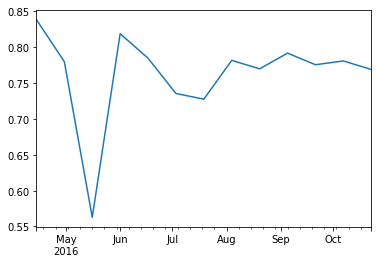

In [14]:
df.Cabauw.plot()

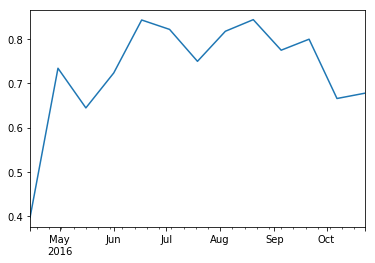

In [15]:
df.Bankenbos.plot()

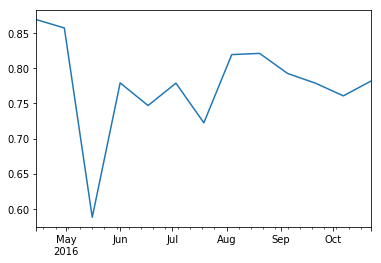

In [16]:
df.Haastrecht.plot()

In [17]:
pkl_file_name = r'D:\Projects\Pr\3492.10\MYD13Q1\pandas//MYD13Q1.006_12locations.pkl'
df.to_pickle(pkl_file_name)  # where to save it, usually as a .pkl